<a href="https://colab.research.google.com/github/saikiran369369/CODESOFT/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# importing the required libraries for our project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

LOADING THE DATASET

In [24]:
#loading the data
columns = ['Sepal length','Sepal width','Petal length','Petal width','Class_labels']
df = pd.read_csv('IRIS.csv',names=columns)

VISUALIZATION OF OUR DATASET

In [25]:
# Convert relevant columns to numeric
for col in ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' handles errors gracefully

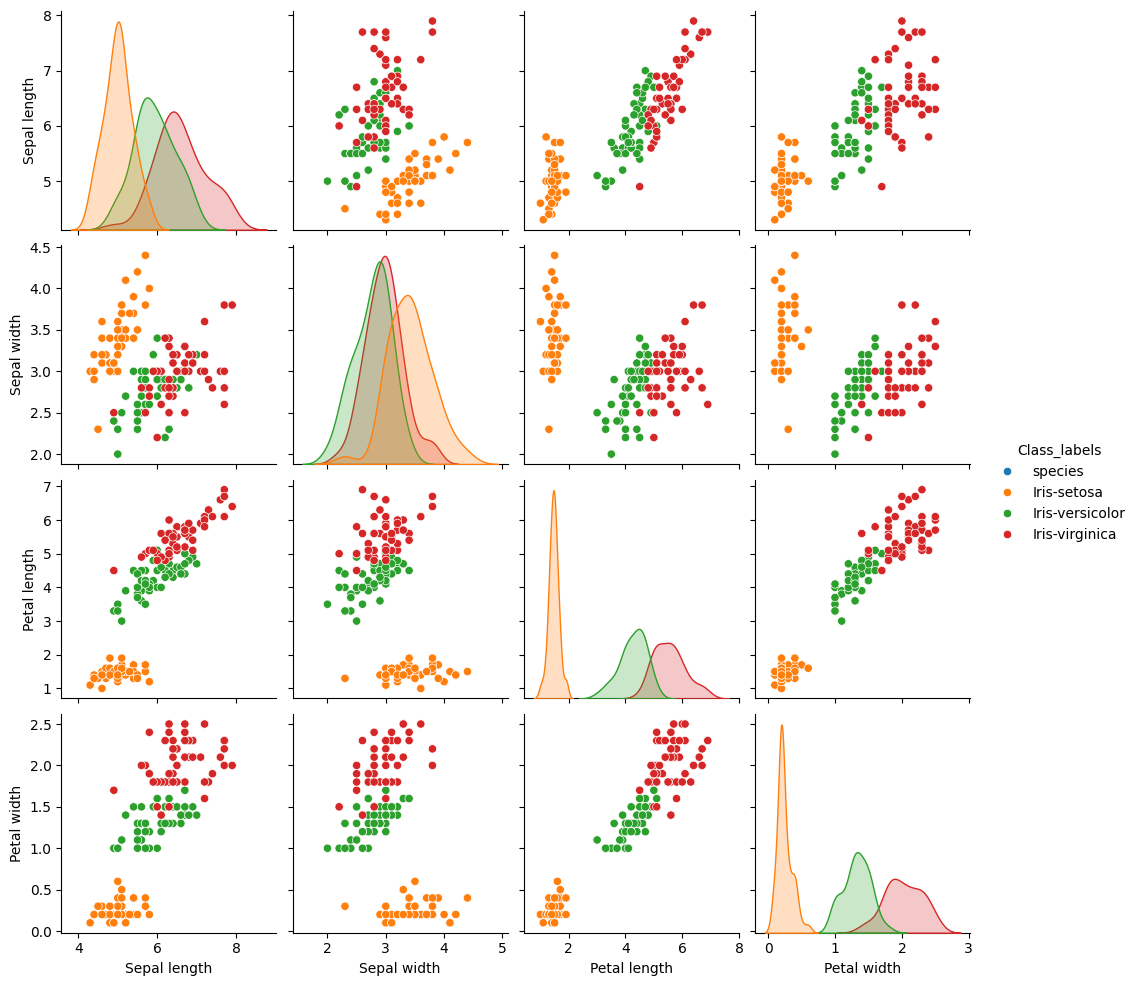

In [26]:
#visualize whole dataset
sns.pairplot(df,hue='Class_labels')

SEPARATING INPUT AND OUTPUT COLUMNS

In [27]:
#Separate features and target
data = df.values
X = data[:,0:4]
Y = data[:,4]
print(X)

[[nan nan nan nan]
 [5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.

SPLITTING THE DATA INTO TRAINING AND TESTING DATA

In [32]:
#split the data to train and test the data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean of the column

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print(X_test)

[[5.7 2.8 4.5 1.3]
 [4.9 3.1 1.5 0.1]
 [6.8 3.2 5.9 2.3]
 [5.6 2.8 4.9 2. ]
 [5.9 3.  5.1 1.8]
 [6.3 2.9 5.6 1.8]
 [5.  2.3 3.3 1. ]
 [5.  3.5 1.6 0.6]
 [5.7 4.4 1.5 0.4]
 [5.  3.4 1.6 0.4]
 [6.2 3.4 5.4 2.3]
 [5.7 2.5 5.  2. ]
 [6.9 3.2 5.7 2.3]
 [5.8 2.8 5.1 2.4]
 [6.1 2.8 4.  1.3]
 [5.8 2.6 4.  1.2]
 [4.6 3.4 1.4 0.3]
 [5.7 2.6 3.5 1. ]
 [5.4 3.7 1.5 0.2]
 [5.9 3.  4.2 1.5]
 [6.7 3.  5.2 2.3]
 [4.9 3.1 1.5 0.1]
 [6.9 3.1 4.9 1.5]
 [6.3 3.3 4.7 1.6]
 [5.  3.3 1.4 0.2]
 [6.  2.2 5.  1.5]
 [4.9 3.1 1.5 0.1]
 [6.5 3.  5.8 2.2]
 [5.  3.5 1.3 0.3]
 [5.8 2.7 5.1 1.9]
 [6.2 2.8 4.8 1.8]]


Model1 :- SUPPORT VECTOR MACHINE ALGORITHM

In [33]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train,Y_train)

SVC()

In [36]:
prediction1 = model_svc.predict(X_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test ,prediction1)*100)
for i in range(len(prediction1)):
  print(Y_test[i],prediction1[i])

90.32258064516128
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-versicolor


MODEL 2 : LOGISTIC REGRESSION

In [38]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train,Y_train)

LogisticRegression()

In [41]:
prediction2 = model_LR.predict(X_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test ,prediction2)*100)
for i in range(len(prediction1)):
  print(Y_test[i],prediction1[i])

93.54838709677419
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-versicolor


MODEL 3 : DECISION TREE CLASSIFIER

In [44]:
# Desision tree classifier
from sklearn.tree import DecisionTreeClassifier
model_DTC= DecisionTreeClassifier()
model_DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [46]:
prediction3 = model_svc.predict(X_test)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(Y_test,prediction3))

0.9032258064516129


In [47]:
# detailed classification report
from sklearn.metrics import classification_report
print(accuracy_score(Y_test,prediction3))
# Detailed classification report
print(classification_report(Y_test,prediction3))

0.9032258064516129
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.73      1.00      0.84         8
 Iris-virginica       1.00      0.77      0.87        13

       accuracy                           0.90        31
      macro avg       0.91      0.92      0.90        31
   weighted avg       0.93      0.90      0.90        31



In [48]:
X_new = np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
#prediction of the spies from the input vector
prediction = model_svc.predict(X_new)
print("prediction of species : {}".format(prediction))

prediction of species : ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']
